In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


from google.colab import data_table
data_table.enable_dataframe_formatter()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/gdrive/MyDrive/Lab01_Doe_J_SP24/bank01-1 (1).csv')
data

Mounted at /content/gdrive


<ipython-input-1-4b2b4fd92c25>:12: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/gdrive/MyDrive/Lab01_Doe_J_SP24/bank01-1 (1).csv')


,int_tgt,demog_age,demog_ho,demog_homeval,demog_inc,demog_pr,rfm1,rfm2,rfm3,rfm4,rfm5,rfm6,rfm7,rfm8,rfm9,rfm10,rfm11,rfm12,demog_genf,demog_genm
0,0.0,42.0,no,90780,66811.0,0,7.4,6.05,6.75,10.0,5,40,4,22,7,28,7,126,yes,no
1,0.0,39.0,yes,191693,101626.0,0,5.14,4.88,5.00,5.0,7,8,6,7,22,12,6,41,no,yes
2,0.0,72.0,yes,141773,54565.0,1,12.75,9.00,14.50,12.0,5,11,3,5,19,14,7,65,no,yes
3,0.0,63.0,no,35283,0.0,1,3.67,3.92,3.25,10.0,7,27,5,16,8,13,5,129,no,yes
4,0.0,NaN,no,500006,0.0,24,15,11.80,15.00,15.0,4,11,3,7,17,15,7,53,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127084,500000.0,NaN,no,65017.0,64749.0,22,500.0,255.17,NaN,500.0,1,6,0,3,9,35,8,93,no,yes
127085,500000.0,NaN,no,65028.0,64743.0,23,500.0,255.17,NaN,500.0,2,7,1,4,10,36,9,94,yes,no
127086,500000.0,NaN,no,65003.0,64748.0,22,499.0,255.17,NaN,499.0,1,6,0,3,9,35,8,93,yes,no
127087,500000.0,NaN,no,64998.0,64745.0,22,500.0,255.17,NaN,500.0,1,6,0,3,9,35,8,93,no,yes


In [4]:

 # Task 1
 # Summarize data
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

outliers = data[numerical_cols][(data[numerical_cols] < 0) | (data[numerical_cols] > 1000000)].sum()

unique_values = data['demog_ho'].unique()
unique_values = data['demog_genf'].unique()
unique_values = data['demog_genm'].unique()

outliers, unique_values


(int_tgt     -450240.0
 demog_age        -3.0
 demog_inc         0.0
 demog_pr          0.0
 rfm2              0.0
 rfm3              0.0
 rfm4              0.0
 rfm5              0.0
 rfm6              0.0
 rfm7              0.0
 rfm8              0.0
 rfm9              0.0
 rfm10             0.0
 rfm11             0.0
 rfm12             0.0
 dtype: float64,
 array(['NO', 'YES', 'YESSSSSSS', 'NOOOOO'], dtype=object))

In [6]:
# Task 2 Duplicate the dataset
bank_shaik = data.copy()

# Standardize categorical values (e.g., YES, NO, and correct spelling)
bank_shaik['demog_ho'] = bank_shaik['demog_ho'].str.upper().replace({'YESSSSS': 'YES', 'YESs': 'YES'})
bank_shaik['demog_genf'] = bank_shaik['demog_genf'].str.upper().replace({'YESSSSS': 'YES', 'YESs': 'YES'})
bank_shaik['demog_genm'] = bank_shaik['demog_genm'].str.upper().replace({'YESSSSS': 'YES', 'YESs': 'YES'})

# Correct numeric values outside expected ranges (e.g., age > 130)
bank_shaik['demog_age'] = bank_shaik['demog_age'].apply(lambda x: None if x > 130 else x)

# Label values outside expected ranges as missing
bank_shaik.loc[bank_shaik['int_tgt'] < 0, 'int_tgt'] = None

# Calculate missing values
missing_data = pd.DataFrame({

    'Variable Name': bank_shaik.columns,
    'Number of Missing Values': bank_shaik.isnull().sum(),
    'Percent Missing (%)': bank_shaik.isnull().mean() * 100

})

print(missing_data)


               Variable Name  Number of Missing Values  Percent Missing (%)
int_tgt              int_tgt                        21             0.016524
demog_age          demog_age                     31613            24.874694
demog_ho            demog_ho                         0             0.000000
demog_homeval  demog_homeval                         0             0.000000
demog_inc          demog_inc                         0             0.000000
demog_pr            demog_pr                         0             0.000000
rfm1                    rfm1                         0             0.000000
rfm2                    rfm2                         0             0.000000
rfm3                    rfm3                      9912             7.799259
rfm4                    rfm4                         0             0.000000
rfm5                    rfm5                         0             0.000000
rfm6                    rfm6                         0             0.000000
rfm7        

In [ ]:
#task 3
# Create a new dataset for imputation
bank_shaik_revised = bank_shaik.copy()

# Impute missing numerical values with mean
numerical_cols = bank_shaik_revised.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    bank_shaik_revised[col] = bank_shaik_revised[col].fillna(bank_shaik_revised[col].mean())


# Impute missing categorical values with mode
categorical_cols = bank_shaik_revised.select_dtypes(include=['object']).columns
for col in categorical_cols:
    bank_shaik_revised[col].fillna(bank_shaik_revised[col].mode()[0], inplace=True)

# Descriptive statistics for demog_age and rfm1
age_stats = bank_shaik_revised['demog_age'].describe()
rfm1_stats = bank_shaik_revised['rfm1'].describe()

# Contingency table for demog_ho and demog_genf
contingency_table = pd.crosstab(bank_shaik_revised['demog_ho'], bank_shaik_revised['demog_genf'])

age_stats, rfm1_stats, contingency_table


<ipython-input-15-c58048f11ddb>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_shaik_revised[col].fillna(bank_shaik_revised[col].mode()[0], inplace=True)


(count    127089.000000
 mean         60.608540
 std          15.012354
 min          -1.000000
 25%          53.000000
 50%          60.608540
 75%          72.000000
 max          89.000000
 Name: demog_age, dtype: float64,
 count     127089.0
 unique      1388.0
 top           10.0
 freq        5275.0
 Name: rfm1, dtype: float64,
 demog_genf     NO  NOOOOO    YES  YESSSSSSS
 demog_ho                                   
 NO          21773       1  35575          0
 YES         30999       1  38739          1)

The variable with the highest correlation with 'int_tgt' is 'rfm1' with a corr value of 0.40520409190628953.


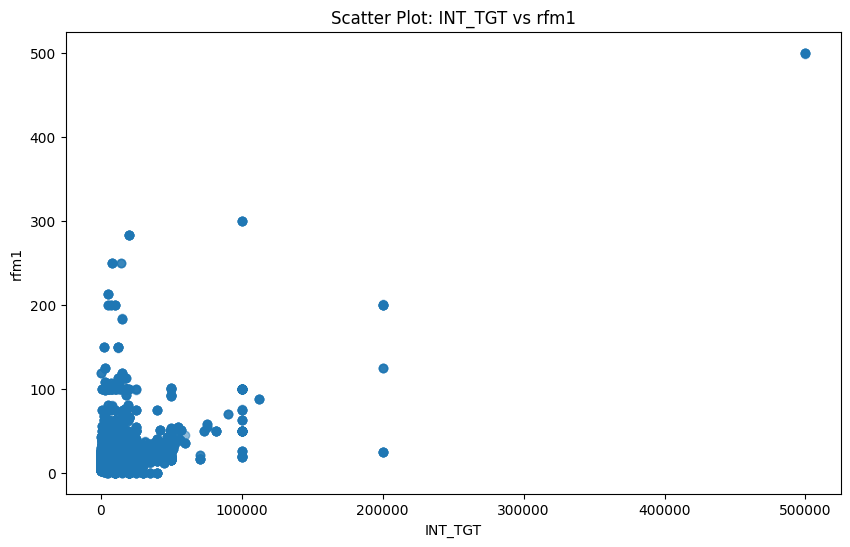

In [ ]:
#task 4
# Replace with NaN
invalid_values = ['ZZZZZ', 'unknown', 'NA']
bank_shaik_revised.replace(invalid_values, pd.NA, inplace=True)


categorical_columns = ['demog_ho', 'demog_genf', 'demog_genm']
for col in categorical_columns:

    bank_shaik_revised[col] = bank_shaik_revised[col].map({'YES': 1, 'NO': 0, 'yes': 1, 'no': 0})

    mode_value = bank_shaik_revised[col].mode()
    if not mode_value.empty:
        bank_shaik_revised[col] = bank_shaik_revised[col].fillna(mode_value[0])
    else:

        bank_shaik_revised[col] = bank_shaik_revised[col].fillna(0)


bank_shaik_revised = bank_shaik_revised.apply(pd.to_numeric, errors='coerce')


correlation = bank_shaik_revised.corr()


if 'int_tgt' in correlation.columns:
    target_corr = correlation['int_tgt'].drop('int_tgt')


    if not target_corr.empty:

        highest_corr_col = target_corr.abs().idxmax()
        highest_corr_value = target_corr[highest_corr_col]

        # Output the result
        print(f"The variable with the highest correlation with 'int_tgt' is '{highest_corr_col}' with a corr value of {highest_corr_value}.")

        # Step 7: scatter plot from correlation
        plt.figure(figsize=(10, 6))
        plt.scatter(bank_shaik_revised['int_tgt'], bank_shaik_revised[highest_corr_col], alpha=0.5)
        plt.title(f'Scatter Plot: INT_TGT vs {highest_corr_col}')
        plt.xlabel('INT_TGT')
        plt.ylabel(highest_corr_col)
        plt.show()




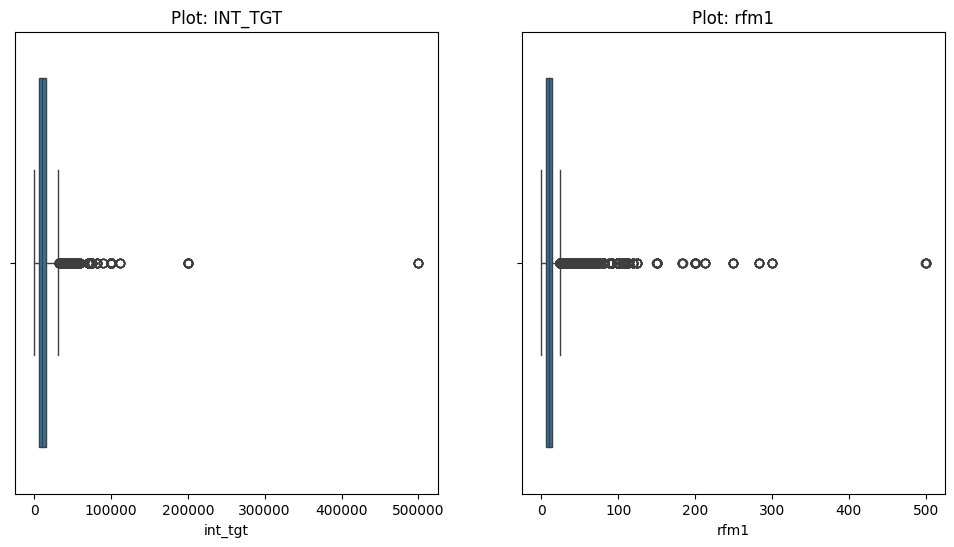

,0
int_tgt,1099
demog_age,2152
demog_inc,2345
demog_pr,6488
rfm2,6636
rfm3,6213
rfm4,3401
rfm5,1493
rfm6,5243
rfm7,310


In [ ]:
# task 5
# Calculate interquatile ranges
IQR1 = bank_shaik_revised[numerical_cols].quantile(0.25)
IQR3 = bank_shaik_revised[numerical_cols].quantile(0.75)
IQR = IQR3 - IQR1
outliers = ((bank_shaik_revised[numerical_cols] < (IQR1 - 1.5 * IQR)) | (bank_shaik_revised[numerical_cols] > (IQR3 + 1.5 * IQR))).sum()

# create boxes for two plots
plt.figure(figsize=(12, 6))

# Plot for INT_TGT
plt.subplot(1, 2, 1)
sns.boxplot(data=bank_shaik_revised, x='int_tgt')
plt.title('Plot: INT_TGT')

# Plot for highest correlated variable
plt.subplot(1, 2, 2)
sns.boxplot(data=bank_shaik_revised, x=highest_corr_col)
plt.title(f'Plot: {highest_corr_col}')

plt.show()

outliers
